In [1]:
import torchvision
import pandas as pd
from torch.utils.data import DataLoader

from maderapp.data import MaderappPatchesDataset, MaderappDataset
from maderapp.utils import show

In [2]:
metadata = pd.DataFrame({
    "x1": ["images/img.jpg", "images/img.jpg"],
    "x2": [0,0]
})

In [3]:
class_names = sorted(metadata.iloc[:, 1].value_counts().index)
class_names2ids = {j: i for i, j in enumerate(class_names)}
class_ids2names = {j: i for i, j in class_names2ids.items()}

In [4]:
from albumentations.core.composition import Compose as Acompose
import albumentations as A
from albumentations.pytorch import ToTensorV2

tranformation = A.Compose(
    [
        #A.Resize(224, 224),
        A.RandomCrop(width=64, height=64),
        A.augmentations.geometric.rotate.Rotate(),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        # A.Normalize(
        #     mean=[0.485, 0.456, 0.406],
        #     std=[0.229, 0.224, 0.225],
        # ),
        ToTensorV2(),
    ]
)

training_data = MaderappPatchesDataset(img_dir="../", annotations_file=metadata, class_names2ids=class_names2ids, transform=tranformation, patches_kernel=64, patches_shuffle=True,)
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)

In [5]:
images = next(iter(train_dataloader))
train_features, train_labels = images
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

train_features = train_features.reshape(-1, 3, 64, 64)


Feature batch shape: torch.Size([2, 9, 3, 64, 64])
Labels batch shape: torch.Size([2, 9])


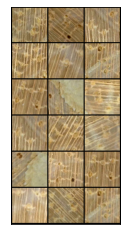

In [6]:
grid = torchvision.utils.make_grid(train_features, 3)
show(grid)